In [60]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
import networkx as nx
from os.path import join
import json
import numpy as np
from copy import deepcopy
from tqdm.autonotebook import tqdm

In [62]:
import matplotlib
matplotlib.rcParams['legend.loc'] = 'lower right'
matplotlib.rcParams['legend.fontsize'] = 9
pd.options.display.float_format = "{:,.2f}".format


In [63]:
class AvgDegreeExtractor:
    def __init__(self):
        self._i = 0
        self._output_dict = {}
        
    def _get_single_network_avg_degrees(self, m, p, group_size, network):
        # define paths
        adj_list_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','Networks', group_size, f'partitions_map_{network}_test_network.adjlist')
        train_partition_map_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','PartitionMaps', group_size, f'partitions_map_{network}_train.json')
        test_partition_map_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','PartitionMaps', group_size, f'partitions_map_{network}_test.json')

        # open whole graph and its parition map
        G = nx.read_adjlist(adj_list_fp)

        temp_dict = {'inter_p': p, 'anom_m': m, 'group_size': group_size, 'network_num': network}
        
        # Extract anomalous avg. degrees
        temp_dict['nodes_inc_generated'] = len(G.nodes())
        temp_dict['edges_inc_generated'] = len(G.edges())

        generated_nodes = [n for n in G.nodes() if 'GenNode' in n]
        temp_dict['generated_nodes'] = len(generated_nodes)

        for n in generated_nodes:
            G.remove_node(n)
        temp_dict['nodes_wo_generated'] = len(G.nodes())
        temp_dict['edges_wo_generated'] = len(G.edges())
        
        return temp_dict
    
    def _get_p_m_size_group_networks_avg_degrees(self, m, p, group_size):
        
        for network in tqdm(range(1, 6), leave=False):
            self._output_dict[self._i] = self._get_single_network_avg_degrees(m=m, p=p, group_size=group_size, network=network)
            self._i += 1
    
    def create_table(self, ms, ps, group_sizes):
        for m in tqdm(ms):
            for p in tqdm(ps, leave=False):
                for group_size in tqdm(group_sizes, leave=False):
                    self._get_p_m_size_group_networks_avg_degrees(m, p, group_size)
        return self._output_dict
    
        

In [16]:
p = 0.3
m = 0.2
group_size = 'min'
network = 1
adj_list_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','Networks', group_size, f'partitions_map_{network}_test_network.adjlist')
train_partition_map_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','PartitionMaps', group_size, f'partitions_map_{network}_train.json')
test_partition_map_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','PartitionMaps', group_size, f'partitions_map_{network}_test.json')


In [35]:
G_test = nx.read_adjlist(adj_list_fp)
with open(train_partition_map_fp, 'r') as file:
    train_partition_map = json.load(file)
with open(test_partition_map_fp, 'r') as file:
    test_partition_map = json.load(file)

In [36]:
len(test_partition_map), len(train_partition_map)

(100, 20)

In [37]:
len(set(test_partition_map.keys()) | set(train_partition_map.keys()))

120

In [38]:
train_nodes_set = set()
for nodes in train_partition_map.values():
    train_nodes_set |= set(nodes)
test_nodes_set = set()
for nodes in test_partition_map.values():
    test_nodes_set |= set(nodes)

In [39]:
len(test_nodes_set), len(train_nodes_set)

(40926, 7807)

In [40]:
len(G_test.nodes())

40926

In [41]:
len(G_test.edges())

71382

In [57]:
generated_nodes = [n for n in G_test.nodes() if 'GenNode' in n]
len(generated_nodes)

400

In [58]:
for n in generated_nodes:
    G_test.remove_node(n)

In [59]:
len(G_test.nodes()), len(G_test.edges())

(40526, 69638)

In [64]:
_ALL_SIZE_GROUPS = ['min', 'quantile10', 'quartile1', 'median', 'random']  # Generated network and # Reddit  # mean?
_ALL_PS = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
_ALL_MS = [0.05, 0.1, 0.2, 0.4, 0.8]  # Reddit
#_ALL_MS = [0.01, 0.02, 0.04, 0.08, 0.16]  # Generated network

In [65]:
ade = AvgDegreeExtractor()

In [68]:
output_dict = ade.create_table(ms = _ALL_MS, ps = _ALL_PS, group_sizes = _ALL_SIZE_GROUPS)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [70]:
output = pd.DataFrame.from_dict(output_dict, orient='index')

In [75]:
output['nodes_wo_generated'].unique(), output['edges_wo_generated'].unique()

(array([40526, 38085, 37785, 34213, 35473], dtype=int64),
 array([69638, 60754, 57741, 64638, 52091], dtype=int64))

In [78]:
#output.to_csv('_num_edges_and_vertices.csv', index=False)

In [79]:
output = pd.read_csv('_num_edges_and_vertices.csv')

In [83]:
output['avg_degree'] = output.apply(lambda x: 2*x.edges_wo_generated / x.nodes_wo_generated, axis=1)

In [92]:
output.groupby('network_num').aggregate({
    'nodes_wo_generated': 'first',
    'edges_wo_generated': 'first',
    'avg_degree': 'first',
    'nodes_inc_generated': ['min', 'mean', 'max'],
    'edges_inc_generated': ['min', 'mean', 'max'],
})

nodes_wo_generated edges_wo_generated avg_degree  \
                         first              first      first   
network_num                                                    
1                        40526              69638       3.44   
2                        38085              60754       3.19   
3                        37785              57741       3.06   
4                        34213              64638       3.78   
5                        35473              52091       2.94   

            nodes_inc_generated                  edges_inc_generated  \
                            min      mean    max                 min   
network_num                                                            
1                         40902 42,223.03  44475               69997   
2                         38516 40,092.91  43396               61209   
3                         38181 39,682.08  42193               58131   
4                         34604 35,776.08  38014               65049   
5                         35871 37,667.04  41642               52456   

                                 
                  mean      max  
network_num                      
1           182,607.10  1205231  
2           253,408.28  2255325  
3           222,026.31  1789183  
4           158,289.12  1027725  
5           241,269.58  2165338

In [25]:
raw_avg_degrees[~raw_avg_degrees['comm_name'].str.contains('AnomComm')]['num_edges'].mean()

1401.351488888889

In [19]:
raw_avg_degrees.loc[
    (raw_avg_degrees['inter_p']==0.05) &
    (raw_avg_degrees['anom_m']==0.05) &
    (raw_avg_degrees['group_size']=='min') &
    (raw_avg_degrees['network_num']==4) 
][['num_vertices', 'num_edges']].sum()

num_vertices    35471
num_edges       71897
dtype: int64

In [16]:
raw_avg_degrees.loc[
    (raw_avg_degrees['inter_p']==0.4) &
    (raw_avg_degrees['anom_m']==0.8) &
    (raw_avg_degrees['group_size']=='random') &
    (raw_avg_degrees['network_num']==4) 
][['num_vertices', 'num_edges']].sum()

num_vertices      40097
num_edges       1652519
dtype: int64

# analysis

## inter_p anlysis (hopefully to ignore)

In [69]:
anom_comm_names = [f'AnomComm000000000{str(i+1).zfill(2)}' for i in range(0, 10)]

In [70]:
def create_single_group_size_anom_m_df(anom_m, group_size):
    output = {}
    for p in _ALL_PS:
        single_exp = raw_avg_degrees.loc[
            raw_avg_degrees['inter_p']==p].loc[
            raw_avg_degrees['anom_m']==anom_m].loc[
            raw_avg_degrees['group_size']==group_size]

        single_exp_norm = single_exp[~single_exp['comm_name'].isin(anom_comm_names)].reset_index()
        single_exp_anom = single_exp[single_exp['comm_name'].isin(anom_comm_names)].reset_index()
        output[p] = {'norm': single_exp_norm['avg_degree'].mean(),'anom': single_exp_anom['avg_degree'].mean()}
    output = pd.DataFrame.from_dict(output, orient='index')
    return output
    
import matplotlib


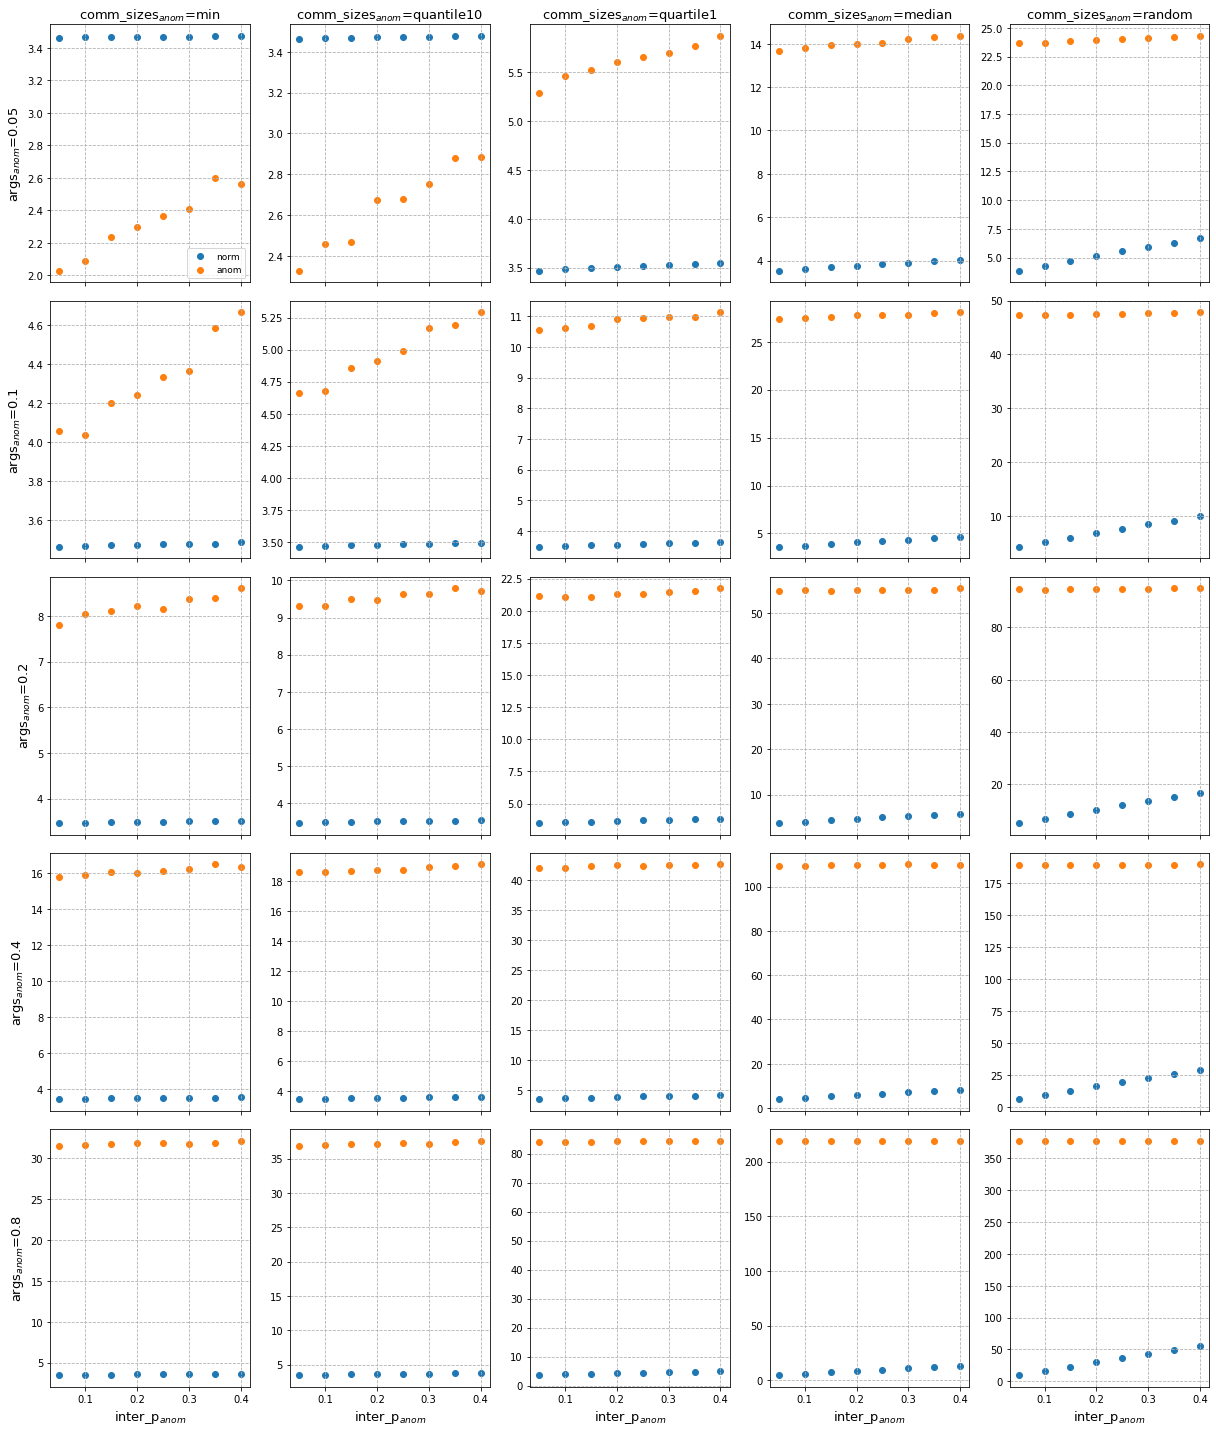

In [71]:
fig, axes = plt.subplots(
    len(_ALL_MS), len(_ALL_SIZE_GROUPS),
    sharex=True,# sharey=True,
    figsize=(17, 20),
    tight_layout=True)

for i, m in enumerate(_ALL_MS):
    for j, size_group in enumerate(_ALL_SIZE_GROUPS):
        
        df = create_single_group_size_anom_m_df(m, size_group)
        axes[i, j].scatter(x=df.index, y=df.norm, label='norm')
        axes[i, j].scatter(x=df.index, y=df.anom, label='anom')
        
        if i==0 and j==0:
            axes[i, j].legend()
        if j == 0:
            #axes[i, j].text(-0.07, 0.53, "args$_{anom}$=" + f"{m}", size=12, verticalalignment='center', rotation=90)
            axes[i, j].set_ylabel("args$_{anom}$=" + f"{m}", size=13)
        #else:
        #	axes[i, j].set_ylabel('Average precision')

        if i == 0:
            axes[i, j].set_title("comm_sizes$_{anom}$=" + f"{size_group}", fontsize=13)
        
        if i == len(_ALL_MS)-1:
            axes[i, j].set_xlabel('inter_p$_{anom}$', fontsize=13)

        axes[i, j].grid(ls='--')

#plt.setp(axes, ylim=(0.03, 1.03), xlim=(0.04, 0.41))

plt.show()

##### Conclusion - P changes is Negligible  for avg_degree

In [72]:
norm_raw_avg_degrees = raw_avg_degrees[~raw_avg_degrees['comm_name'].isin(anom_comm_names)].reset_index()
anom_raw_avg_degrees = raw_avg_degrees[raw_avg_degrees['comm_name'].isin(anom_comm_names)].reset_index()

norm_raw_avg_degrees.shape , anom_raw_avg_degrees.shape

norm_mean_avg_degrees = norm_raw_avg_degrees.groupby(['group_size', 'anom_m']).aggregate({'avg_degree': 'mean'}).reset_index()
norm_mean_avg_degrees['group_size'] = pd.Categorical(
    norm_mean_avg_degrees['group_size'],
    categories=_ALL_SIZE_GROUPS,
)
norm_mean_avg_degrees.sort_values(['group_size', 'anom_m'], inplace=True)

anom_mean_avg_degrees = anom_raw_avg_degrees.groupby(['group_size', 'anom_m']).aggregate({'avg_degree': 'mean'}).reset_index()
anom_mean_avg_degrees['group_size'] = pd.Categorical(
    anom_mean_avg_degrees['group_size'],
    categories=_ALL_SIZE_GROUPS,
)
anom_mean_avg_degrees.sort_values(['group_size', 'anom_m'], inplace=True)

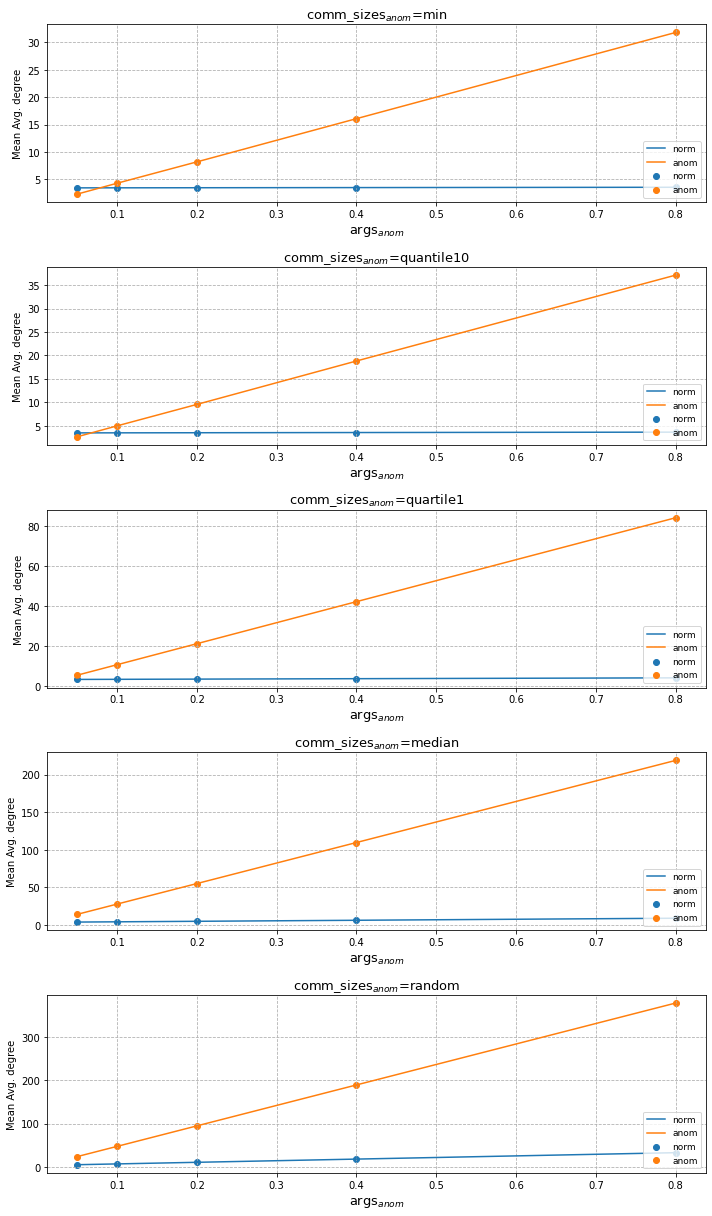

In [73]:
fig, axes = plt.subplots(
    len(_ALL_SIZE_GROUPS), 1,
    #sharex=True,# sharey=True,
    figsize=(10, 17),
    tight_layout=True)

for j, size_group in enumerate(_ALL_SIZE_GROUPS):
        
    norm_mean_avg_degrees_temp = norm_mean_avg_degrees[norm_mean_avg_degrees['group_size']==size_group]
    anom_mean_avg_degrees_temp = anom_mean_avg_degrees[anom_mean_avg_degrees['group_size']==size_group]
    
    axes[j].plot(norm_mean_avg_degrees_temp.anom_m, norm_mean_avg_degrees_temp.avg_degree, label='norm')
    axes[j].plot(anom_mean_avg_degrees_temp.anom_m, anom_mean_avg_degrees_temp.avg_degree, label='anom')
    
    axes[j].scatter(x=norm_mean_avg_degrees_temp.anom_m, y=norm_mean_avg_degrees_temp.avg_degree, label='norm')
    axes[j].scatter(x=anom_mean_avg_degrees_temp.anom_m, y=anom_mean_avg_degrees_temp.avg_degree, label='anom')
    
    axes[j].legend()
    axes[j].set_ylabel('Mean Avg. degree')
    axes[j].set_title("comm_sizes$_{anom}$=" + f"{size_group}", fontsize=13)
    axes[j].set_xlabel("args$_{anom}$", fontsize=13)
    axes[j].grid(ls='--')


plt.show()

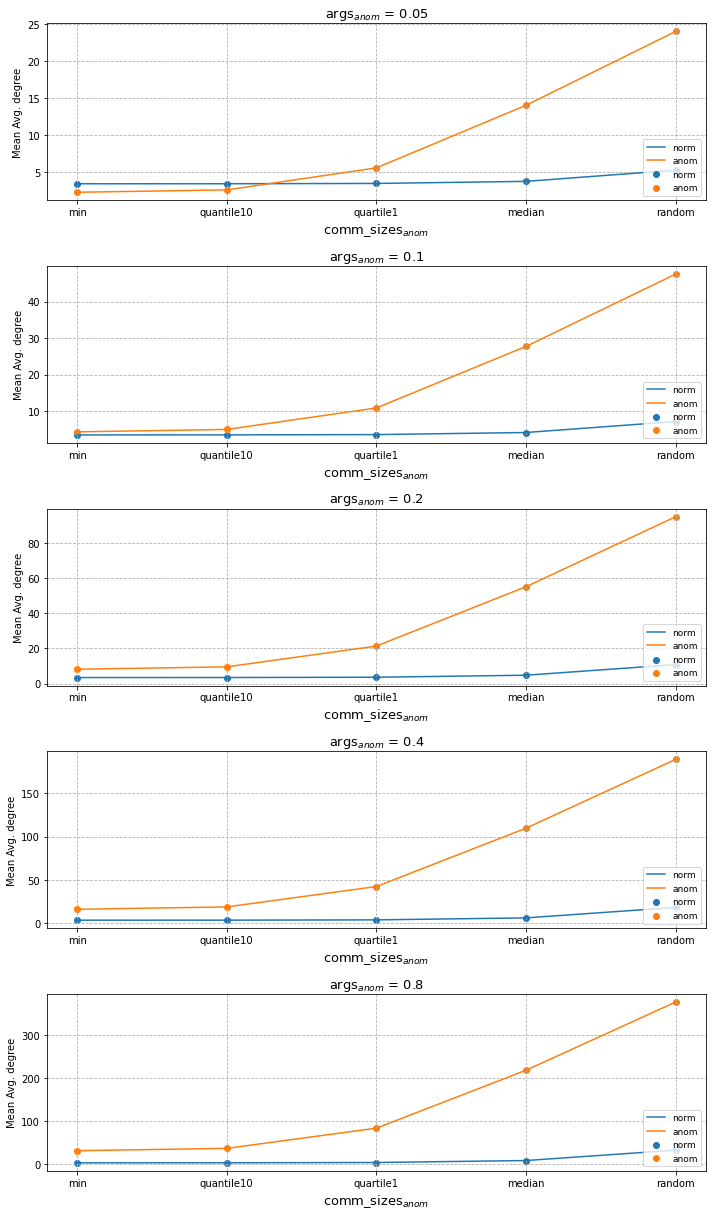

In [74]:
fig, axes = plt.subplots(
    len(_ALL_MS), 1,
    #sharex=True,# sharey=True,
    figsize=(10, 17),
    tight_layout=True)

for j, m in enumerate(_ALL_MS):
        
    norm_mean_avg_degrees_temp = norm_mean_avg_degrees[norm_mean_avg_degrees['anom_m']==m]
    anom_mean_avg_degrees_temp = anom_mean_avg_degrees[anom_mean_avg_degrees['anom_m']==m]
    
    axes[j].plot(norm_mean_avg_degrees_temp.group_size, norm_mean_avg_degrees_temp.avg_degree, label='norm')
    axes[j].plot(anom_mean_avg_degrees_temp.group_size, anom_mean_avg_degrees_temp.avg_degree, label='anom')
    
    axes[j].scatter(x=norm_mean_avg_degrees_temp.group_size, y=norm_mean_avg_degrees_temp.avg_degree, label='norm')
    axes[j].scatter(x=anom_mean_avg_degrees_temp.group_size, y=anom_mean_avg_degrees_temp.avg_degree, label='anom')
    
    axes[j].legend()
    axes[j].set_ylabel('Mean Avg. degree')
    axes[j].set_title("args$_{anom}$ = " + f'{str(m).zfill(2)}', fontsize=13)
    axes[j].set_xlabel("comm_sizes$_{anom}$", fontsize=13)
    axes[j].grid(ls='--')


plt.show()

In [79]:
norm_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')

group_size,min,quantile10,quartile1,median,random
anom_m,,,,,
0.05,3.47,3.47,3.51,3.79,5.30
0.10,3.47,3.48,3.56,4.13,7.14
0.20,3.49,3.50,3.67,4.81,10.84
0.40,3.52,3.55,3.88,6.18,18.24
0.80,3.58,3.63,4.30,8.91,33.03


In [80]:
anom_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')

group_size,min,quantile10,quartile1,median,random
anom_m,,,,,
0.05,2.32,2.64,5.61,14.03,23.98
0.10,4.31,4.97,10.85,27.72,47.53
0.20,8.21,9.55,21.35,55.04,94.75
0.40,16.10,18.83,42.35,109.67,189.11
0.80,31.83,37.17,84.25,218.99,377.78


In [81]:
norm_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')-anom_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')

group_size,min,quantile10,quartile1,median,random
anom_m,,,,,
0.05,1.14,0.83,-2.10,-10.24,-18.68
0.10,-0.83,-1.49,-7.29,-23.59,-40.39
0.20,-4.72,-6.05,-17.68,-50.23,-83.91
0.40,-12.58,-15.28,-38.47,-103.49,-170.87
0.80,-28.26,-33.54,-79.96,-210.09,-344.74


In [82]:
anom_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree') / norm_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')

group_size,min,quantile10,quartile1,median,random
anom_m,,,,,
0.05,0.67,0.76,1.60,3.70,4.53
0.10,1.24,1.43,3.05,6.71,6.65
0.20,2.35,2.73,5.82,11.43,8.74
0.40,4.58,5.31,10.92,17.75,10.37
0.80,8.90,10.24,19.61,24.58,11.44


# size ditribution anlysis

In [176]:
norm_comm_dist = raw_avg_degrees[~raw_avg_degrees['comm_name'].isin(anom_comm_names)]
anom_comm_dist = raw_avg_degrees[raw_avg_degrees['comm_name'].isin(anom_comm_names)]

normal community sizes are affected from their original size (given - sampled from reddit, sampled size from reddit)<br>
and inter_p and anom_comm_sizes, which affects number of interconnections, thus affecting thier sizes

In [177]:
norm_comm_dist = norm_comm_dist.groupby(
    ['inter_p','group_size']).aggregate(
    {'num_vertices': 'describe'}).reset_index()

norm_comm_dist['group_size'] = pd.Categorical(
    norm_comm_dist['group_size'],
    categories=_ALL_SIZE_GROUPS,
)

norm_comm_dist.pivot(
    index='inter_p', columns='group_size', values=('num_vertices', 'mean'))

group_size,min,quantile10,quartile1,median,random
inter_p,,,,,
0.05,426.04,426.08,426.32,427.13,427.98
0.10,426.24,426.28,426.82,428.31,430.08
0.15,426.40,426.53,427.30,429.58,432.18
0.20,426.59,426.73,427.76,430.78,434.44
0.25,426.76,426.94,428.25,432.07,436.56
0.30,426.94,427.17,428.72,433.26,438.53
0.35,427.13,427.35,429.14,434.52,440.78
0.40,427.31,427.59,429.66,435.77,442.69


<AxesSubplot:xlabel='inter_p'>

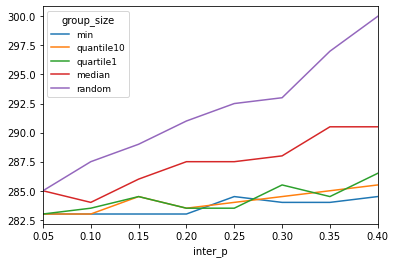

In [174]:
norm_comm_dist.pivot(index='inter_p', columns='group_size', values=('num_vertices', '50%')).plot()

anomalous community sizes are not affected of inter_p it anom_m, thus only checked agians group_size

In [171]:
anom_comm_dist['group_size'] = pd.Categorical(
    anom_comm_dist['group_size'],
    categories=_ALL_SIZE_GROUPS,
)
anom_comm_dist.groupby(['group_size']).aggregate({'num_vertices': ['mean', 'median']})

num_vertices       
                   mean median
group_size                    
min               40.32  40.00
quantile10        47.02  47.00
quartile1        105.84 106.00
median           274.20 274.00
random           472.76 383.50